In [1]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
path = '../../dados/df_train_class.csv'
df = pd.read_csv(path, sep=';')

In [7]:
# primeiro teste com n_clusters=3

0.40838043791319933 0.8679324967287565 918496.1539734104


In [ ]:
# Existe um método chamado método Elbow, projetado para ajudar a encontrar o número ideal de clusters 
# em um conjunto de dados.

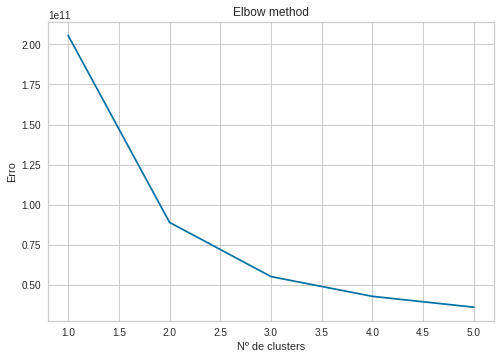

In [7]:
Error =[]
for i in range(1,6):
    kmeans = KMeans(n_clusters=i).fit(df)
    kmeans.fit(df)
    # inertia_ é soma das distâncias quadradas das amostras até o centro do cluster mais próximo, 
    # ponderado pelos pesos das amostras
    Error.append(kmeans.inertia_)

plt.plot(range(1, 6), Error)
plt.title('Elbow method')
plt.xlabel('Nº de clusters')
plt.ylabel('Erro')
plt.show()

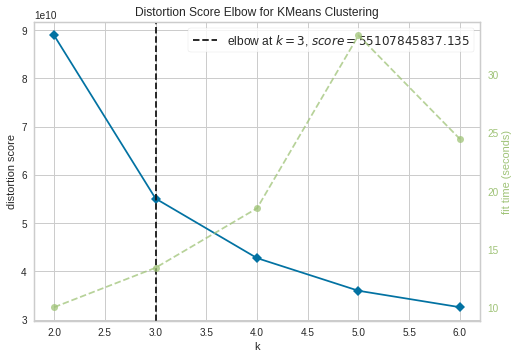

In [9]:
model = KElbowVisualizer(KMeans(), k=6)
model.fit(df)
model.show()

## Implementação com k=4

### Com Yellowbrick

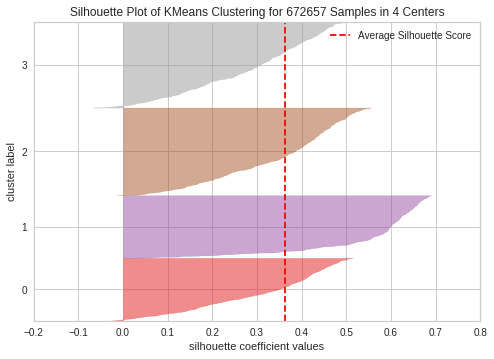

In [13]:
# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

## Implementação SKlearn

In [3]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(df)

In [5]:
labels =kmeans.labels_

In [8]:
s = metrics.silhouette_score(df, labels, metric='euclidean')
dbs = metrics.davies_bouldin_score(df, labels)
calinski = metrics.calinski_harabasz_score(df, labels)

In [9]:
print(s, dbs,calinski)

0.361728901842081 1.009022700785744 853656.5197735636


In [10]:
df["cluster"] = labels

In [11]:
df.to_csv("df_train_cluster.csv", sep=';', index=False)

## Visualização dos Clusters

In [12]:
centers = kmeans.cluster_centers_

In [25]:
var = []

max = len(centers[0])
for i in range(max):
    var.append([df.columns.values[i], centers[:, i].var()])

In [32]:
print(sorted(var,key=lambda l:l[1], reverse=True))

[['tot12m_chuva', 204420.5376496286], ['tot6m_chuva', 51247.09975782005], ['tot3m_chuva', 21309.866848407397], ['tot1m_chuva', 1960.2902786297122], ['med1m_prer_soja', 2.451304052583831], ['med3m_prer_soja', 2.140356300958561], ['med3m_prer_boi', 1.6248776100157296], ['med6m_prer_soja', 1.3035132540367698], ['med1m_prer_boi', 0.9604028121138775], ['med6m_prer_boi', 0.7565578299814775], ['mes', 0.5993218033162031], ['med12m_prer_soja', 0.5098202429169413], ['med6m_prer_milho', 0.39448034764568746], ['med3m_prer_milho', 0.38274857417176306], ['latitude', 0.36782598307610753], ['med1m_prer_milho', 0.270421746524009], ['med12m_prer_milho', 0.1631458155636784], ['med1m_formituinst', 0.15033762413291454], ['classificacao_estabelecimento', 0.1418960256045909], ['med3m_formituinst', 0.1361315832092888], ['longitude', 0.11345110838642593], ['med12m_prer_boi', 0.08131930704312261], ['med12m_formituinst', 0.021128382621515972], ['med6m_formituinst', 0.016314256883787997], ['categoria', 0.01037717

# Visualização

### Cluster vs Categoria

In [48]:
df_c01= df.query('cluster == 1')
df_c02= df.query('cluster == 2')
df_c03= df.query('cluster == 3')
df_c04= df.query('cluster == 4')

In [50]:
categorias = df_c01.categoria.value_counts()
categorias

2    48486
6    26446
4    24750
1    24130
3    10935
5     6149
Name: categoria, dtype: int64

In [51]:
categorias = df_c02.categoria.value_counts()
categorias

2    67838
1    47206
6    30749
4    29768
3    14114
5     7650
Name: categoria, dtype: int64

In [52]:
categorias = df_c03.categoria.value_counts()
categorias

2    50867
1    28058
4    27469
6    19041
3    11071
5     5078
Name: categoria, dtype: int64

In [53]:
categorias = df_c04.categoria.value_counts()
categorias

Series([], Name: categoria, dtype: int64)

In [54]:
df_c04

,tipificacao_1,tipificacao_2,tipificacao_3,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,ilp,ilpf,ifp,...,med12m_prer_boi,cnt1m_cl_ituinst,cnt3m_cl_ituinst,cnt6m_cl_ituinst,cnt12m_cl_ituinst,longitude,latitude,mes,categoria,cluster


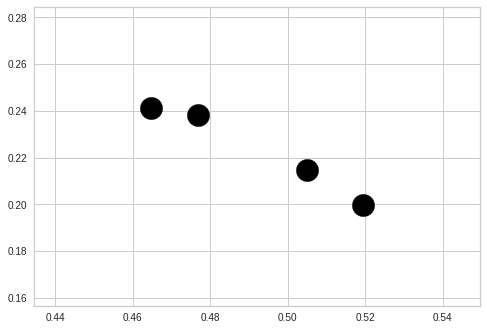

In [16]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
# ax.set_xlabel('Annual Income (k$)')
# ax.set_ylabel('Age')
plt.show()

### Visualização 2

In [18]:
plt.scatter(df[:,0], df[:,1], c=labels, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key